In [ ]:
pip install tensorflow==1.15.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import tensorflow as tf
with tf.compat.v1.Session() as sess:
  a = tf.Variable(0, name = 'input')
  b = tf.constant(1) 

  mid = tf.add(a, b)
  final = tf.compat.v1.assign(a, mid)

  var=tf.compat.v1.initialize_all_variables()

  sess.run(var)
  print(sess.run(a))

  for i in range(3):
    sess.run(final)
    print(sess.run(a))

0
1
2
3


In [ ]:
import numpy as np
import tensorflow as tf
with tf.compat.v1.Session() as sess:
  a = tf.constant(3)
  b = tf.constant(5)

  c = a + b
  print(sess.run(c))

8


In [ ]:
tf.compat.v1.disable_eager_execution()
x = tf.compat.v1.placeholder("float32", None)
y = x**2

with tf.compat.v1.Session() as sess:
  result = sess.run(y, feed_dict = {x:[1,2,3]})
  print(result)

[1. 4. 9.]


In [ ]:
import tensorflow as tf
a=tf.add(1,2, name="addition_1")
b=tf.multiply(a, 3, name="multiplying_1")
c=tf.add(4, 5, name="addition_2")
d=tf.multiply(c, 6, name="multiplying_2")
e=tf.multiply(4, 5)
f=tf.div(c, 6, name="division")

g=tf.add(b, d)
h=tf.multiply(g, f)

with tf.compat.v1.Session() as sess:
  writer=tf.summary.FileWriter("./logs", sess.graph)
  print(sess.run(h))
  writer.close()

63


In [ ]:
import tensorflow as tf
tf.reset_default_graph()
s_scalar=tf.get_variable(name='x_scalar', shape=[], initializer=tf.truncated_normal_initializer(mean=0, stddev=1))
first_summary=tf.summary.scalar(name='First_summary', tensor=s_scalar)
init=tf.global_variables_initializer()
with tf.Session() as sess:
  writer=tf.summary.FileWriter('./logs', sess.graph)

  for i in range(100):
    sess.run(init)
    summary=sess.run(first_summary)
    writer.add_summary(summary, i)

In [ ]:
import tensorflow as tf
tf.reset_default_graph()
s_scalar=tf.get_variable(name='x_scalar', shape=[], initializer=tf.truncated_normal_initializer(mean=0, stddev=1))
y_matrix=tf.get_variable(name='y_matrix', shape=[40, 50], initializer=tf.truncated_normal_initializer(mean=0, stddev=1))

first_summary=tf.summary.scalar(name='First_summary', tensor=s_scalar)

histogram_summary=tf.summary.histogram('histogram_summary', y_matrix)

init=tf.global_variables_initializer()
with tf.Session() as sess:
  writer=tf.summary.FileWriter('./logs', sess.graph)

  for i in range(100):
    sess.run(init)
    summary1, summary2=sess.run([first_summary, histogram_summary])
    writer.add_summary(summary1, i)
    writer.add_summary(summary2, i)

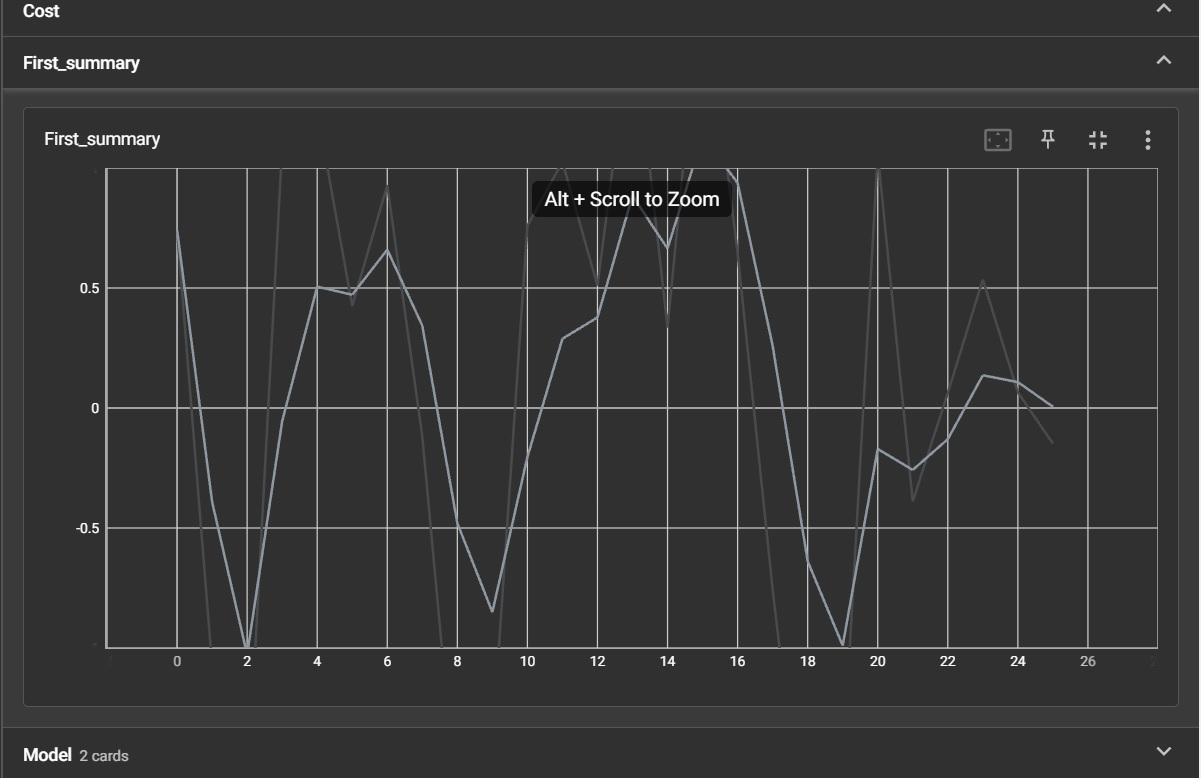